## Hypothesis1 - PM2.5 represents the ambient air quality.

In [123]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import aqi
import warnings
warnings.filterwarnings('ignore')

In [235]:
# Read feather file
df = pd.read_feather('export_UIUC_feather', columns=None, use_threads=True)
df=df.drop(['index'], axis=1)
df

,reading_datestamp,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity
0,2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,10.23,2.91,13.14,75.9,992.6,63.6
1,2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,9.76,2.82,12.58,77.0,992.5,62.5
2,2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,11.70,2.88,14.58,77.7,993.0,61.5
3,2021-09-02 05:30:00,265.17,412.49,15.54,7.48,20.59,5.20,6.77,7.84,9.82,9.82,2.78,12.60,78.4,992.3,61.0
4,2021-09-02 05:45:00,256.95,408.79,17.10,6.56,23.36,5.40,6.97,8.12,10.32,10.32,2.92,13.24,79.2,992.9,59.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8540,2021-11-30 14:00:00,300.71,426.00,3.34,5.50,30.32,3.20,4.52,5.50,9.11,9.11,1.83,8.84,54.3,992.7,58.5
8541,2021-11-30 14:15:00,303.22,425.16,2.44,5.20,29.64,3.21,4.38,5.31,9.70,9.72,1.81,7.64,54.1,992.9,58.8
8542,2021-11-30 14:30:00,313.67,426.00,3.17,5.35,29.84,3.20,4.41,5.38,9.14,9.14,1.82,8.52,54.0,992.9,58.8
8543,2021-11-30 14:45:00,309.89,426.85,5.20,4.53,33.18,3.15,4.51,5.44,8.46,8.46,1.79,9.73,53.6,992.9,58.8


In [236]:
df['reading_datestamp'] = pd.to_datetime(df['reading_datestamp'])
# set a column as the index
df.set_index('reading_datestamp', inplace=True)
df.head()

,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity
reading_datestamp,,,,,,,,,,,,,,,
2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,10.23,2.91,13.14,75.9,992.6,63.6
2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,9.76,2.82,12.58,77.0,992.5,62.5
2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,11.70,2.88,14.58,77.7,993.0,61.5
2021-09-02 05:30:00,265.17,412.49,15.54,7.48,20.59,5.20,6.77,7.84,9.82,9.82,2.78,12.60,78.4,992.3,61.0
2021-09-02 05:45:00,256.95,408.79,17.10,6.56,23.36,5.40,6.97,8.12,10.32,10.32,2.92,13.24,79.2,992.9,59.8


(18872.0, 18959.0)

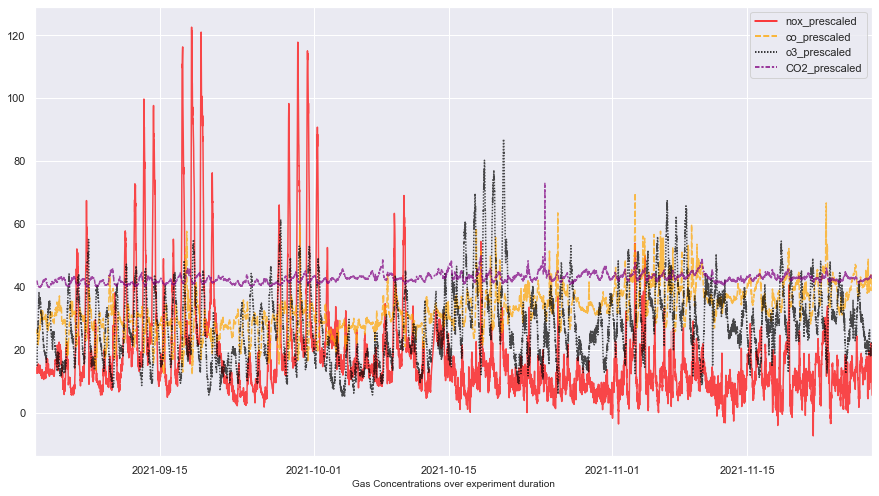

In [59]:
df_scale=df.copy()
df_scale['co_prescaled']=df_scale['co_prescaled']/10
df_scale['CO2_prescaled']=df_scale['CO2_prescaled']/10
sns.set_context("notebook", font_scale=1)
sns.set(rc={'figure.figsize':(15,8.27)})
left = dt(2021,9,2)
right = dt(2021,11,28)
ax = sns.lineplot(data=df_scale[['nox_prescaled', 'co_prescaled', 'o3_prescaled','CO2_prescaled']], palette = ['red', 'orange','black','purple'], alpha=0.7)
ax.set_xlabel('Gas Concentrations over experiment duration', fontsize=10)
ax.set_xlim(left, right)

In [66]:
# Now we will import the data acquired and cleaned from PurpleAir.com for 3 locations and merge with our dataset.

df_urbanaOH = pd.read_feather('export_UrbanaOnHolmes_feather', columns=None, use_threads=True)
df_urbanaOH['new_date'] = pd.to_datetime(df_urbanaOH['new_date'])
df_urbanaOH=df_urbanaOH[['new_date','PM2.5 (CF=1) ug/m3']]
df_urbanaOH = df_urbanaOH.rename({'new_date': 'reading_datestamp','PM2.5 (CF=1) ug/m3': 'pm2.5_UrbanaOH' }, axis=1)
df_urbanaOH.set_index('reading_datestamp', inplace=True)
#df_urbanaOH
df_urbanaOH = df_urbanaOH[df_urbanaOH.index.isin(df.index)]

df_urbana = pd.read_feather('export_Urbana_feather', columns=None, use_threads=True)
df_urbana['new_date'] = pd.to_datetime(df_urbana['new_date'])
df_urbana=df_urbana[['new_date','PM2.5 (CF=1) ug/m3']]
df_urbana = df_urbana.rename({'new_date': 'reading_datestamp','PM2.5 (CF=1) ug/m3': 'pm2.5_Urbana' }, axis=1)
df_urbana.set_index('reading_datestamp', inplace=True)
# df_urbana
df_urbana = df_urbana[df_urbana.index.isin(df.index)]

df_champaign = pd.read_feather('export_WarnowChacko_feather', columns=None, use_threads=True)
df_champaign['new_date'] = pd.to_datetime(df_champaign['new_date'])
df_champaign=df_champaign[['new_date','PM2.5 (CF=1) ug/m3']]
df_champaign = df_champaign.rename({'new_date': 'reading_datestamp','PM2.5 (CF=1) ug/m3': 'pm2.5_Champaign' }, axis=1)
df_champaign.set_index('reading_datestamp', inplace=True)
# df_champaign
df_champaign = df_champaign[df_champaign.index.isin(df.index)] 
#Since the location in Champaign has data missing for some days we will keep it seperate for now.

combined_urbana= pd.merge(df_urbanaOH,df_urbana, on='reading_datestamp')
merged= pd.merge(df,combined_urbana, on='reading_datestamp')
merged.info() # This is the data for UIUC + 2 purple air locations in Urbana
df_champaign.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8316 entries, 2021-09-02 04:45:00 to 2021-11-28 08:45:00
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   co_prescaled       8316 non-null   float64
 1   CO2_prescaled      8316 non-null   float64
 2   no_prescaled       8316 non-null   float64
 3   no2_prescaled      8316 non-null   float64
 4   o3_prescaled       8316 non-null   float64
 5   pm1_prescale       8290 non-null   float64
 6   pm2_5_prescale     8290 non-null   float64
 7   pm4_prescale       8290 non-null   float64
 8   pm10_prescale      8290 non-null   float64
 9   pm_total_prescale  8290 non-null   float64
 10  pm_tpc_prescale    8290 non-null   float64
 11  nox_prescaled      8316 non-null   float64
 12  temperature_f      8316 non-null   float64
 13  pressure           8316 non-null   float64
 14  humidity           8316 non-null   float64
 15  pm2.5_UrbanaOH     8316 non-null   f

# Converting concentrations to AIR Quality Index

To get AQI values from PM2.5 we will directly convert the PM2.5 concentrations to AQI using U.S EPA algorithm.

In [75]:
df_aqi = merged.copy()
from functions import val_to_aqi
df_aqi['AQI_UIUC_PM25']=val_to_aqi('POLLUTANT_PM25', df_aqi['pm2_5_prescale']) #based on pm2.5 vals from UIUC sensor
df_aqi['AQI_UrbanaOH']=val_to_aqi('POLLUTANT_PM25', df_aqi['pm2.5_UrbanaOH'])
df_aqi['AQI_Urbana']=val_to_aqi('POLLUTANT_PM25', df_aqi['pm2.5_Urbana'])
df_aqi_25= df_aqi[['AQI_UrbanaOH','AQI_Urbana','AQI_UIUC_PM25']].copy()
df_aqi_25

,AQI_UrbanaOH,AQI_Urbana,AQI_UIUC_PM25
reading_datestamp,,,
2021-09-02 04:45:00,35,31,29
2021-09-02 05:00:00,38,34,28
2021-09-02 05:15:00,38,35,29
2021-09-02 05:30:00,40,37,28
2021-09-02 05:45:00,38,38,29
...,...,...,...
2021-11-28 07:45:00,62,57,28
2021-11-28 08:00:00,62,58,27
2021-11-28 08:15:00,62,58,27


In [76]:
from functions import combined_aqi

df_aqi = merged[['co_prescaled','no2_prescaled','o3_prescaled','pm10_prescale','pm2_5_prescale']].copy()
df_aqi= df_aqi.dropna()
df_aqi.reset_index(level=0, inplace=True)
df_aqi['co_prescaled']= df_aqi['co_prescaled']/1000
df_aqi['o3_prescaled']=df_aqi['o3_prescaled']/1000

for i in df_aqi.index.values.tolist():
    df_aqi.loc[i,'combAQI'] = combined_aqi(df_aqi.iloc[i].tolist())
    
df_aqi.set_index('reading_datestamp', inplace=True)
df_aqi_uiuc=df_aqi[['combAQI']].copy()
df_aqi_uiuc

,combAQI
reading_datestamp,
2021-09-02 04:45:00,29.0
2021-09-02 05:00:00,28.0
2021-09-02 05:15:00,29.0
2021-09-02 05:30:00,28.0
2021-09-02 05:45:00,29.0
...,...
2021-11-28 07:45:00,28.0
2021-11-28 08:00:00,27.0
2021-11-28 08:15:00,27.0


In [77]:
AQI_combined= pd.merge(df_aqi_uiuc,df_aqi_25, on='reading_datestamp')
#AQI_combined.reset_index(level=0, inplace=True)
AQI_combined

,combAQI,AQI_UrbanaOH,AQI_Urbana,AQI_UIUC_PM25
reading_datestamp,,,,
2021-09-02 04:45:00,29.0,35,31,29
2021-09-02 05:00:00,28.0,38,34,28
2021-09-02 05:15:00,29.0,38,35,29
2021-09-02 05:30:00,28.0,40,37,28
2021-09-02 05:45:00,29.0,38,38,29
...,...,...,...,...
2021-11-28 07:45:00,28.0,62,57,28
2021-11-28 08:00:00,27.0,62,58,27
2021-11-28 08:15:00,27.0,62,58,27


In [78]:
# Now let us combine all 3 purple air AQI values with AQI from UIUC sensor PM2.5 only and PM + gases combined
df_champaign_AQI = pd.DataFrame()
df_champaign_AQI['reading_datestamp'] = df_champaign.index

df_champaign_AQI['AQI_Champaign']=val_to_aqi('POLLUTANT_PM25', df_champaign['pm2.5_Champaign'])

df_champaign_AQI=df_champaign_AQI.iloc[0:6062]
# df_champaign_AQI

AQI_combined_all= pd.merge(AQI_combined,df_champaign_AQI,  how='inner', on='reading_datestamp')
AQI_combined_all.set_index('reading_datestamp', inplace=True)
AQI_combined_all

,combAQI,AQI_UrbanaOH,AQI_Urbana,AQI_UIUC_PM25,AQI_Champaign
reading_datestamp,,,,,
2021-09-25 16:00:00,24.0,4,4,12,4
2021-09-25 16:15:00,23.0,3,4,12,5
2021-09-25 16:30:00,24.0,5,3,9,3
2021-09-25 16:45:00,22.0,3,3,9,3
2021-09-25 17:00:00,24.0,3,3,9,3
...,...,...,...,...,...
2021-11-28 07:45:00,28.0,62,57,28,42
2021-11-28 08:00:00,27.0,62,58,27,43
2021-11-28 08:15:00,27.0,62,58,27,45


(0.0, 200.0)

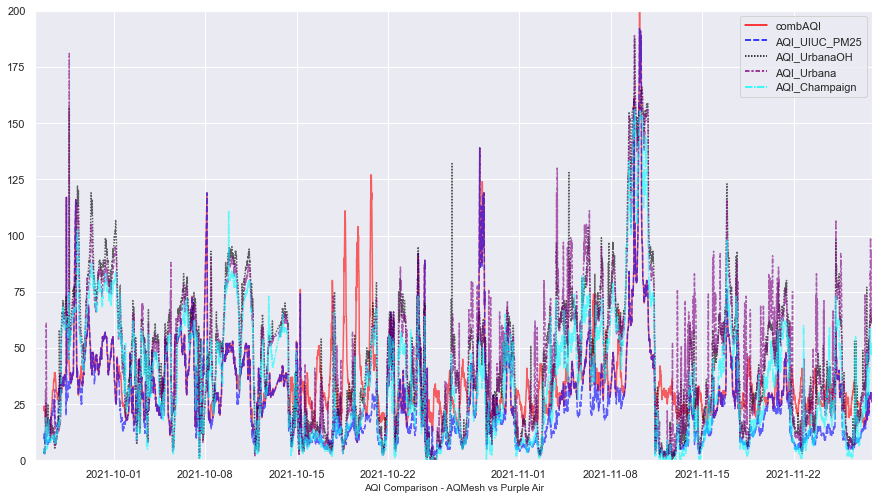

In [194]:

sns.set_context("notebook", font_scale=1)
sns.set(rc={'figure.figsize':(15,8.27)})
left = dt(2021,9,25)
right = dt(2021,11,28)
ax = sns.lineplot(data=AQI_combined_all[['combAQI','AQI_UIUC_PM25', 'AQI_UrbanaOH','AQI_Urbana','AQI_Champaign']],
                  palette = ['red', 'blue','black','purple', 'cyan'], alpha=0.6)
#ax = sns.lineplot(data=df_champaign[['pm2.5_Champaign']], palette = ['brown'], alpha=0.6)
ax.set_xlabel('AQI Comparison - AQMesh vs Purple Air', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 200)

## All values almost overlap eachother.

(0.0, 125.0)

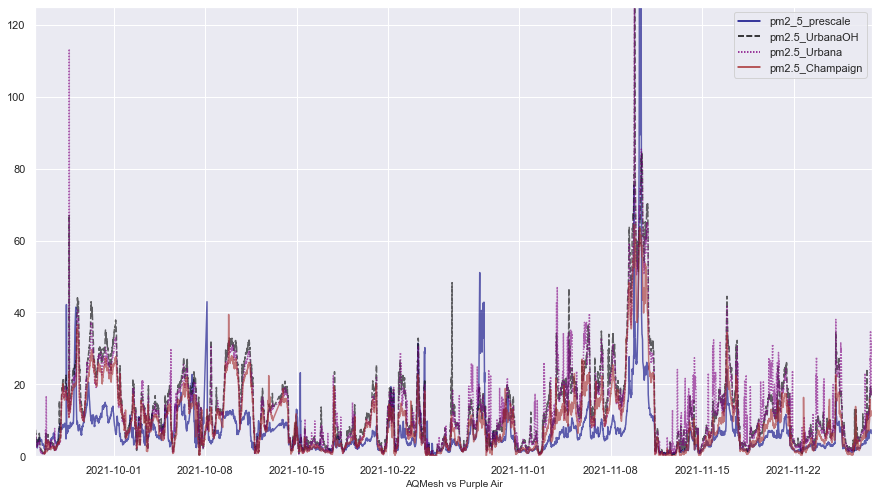

In [196]:
from datetime import datetime as dt
import seaborn as sns
sns.set_context("notebook", font_scale=1,rc={'figure.figsize':(18,6)})
left = dt(2021,9,25)
right = dt(2021,11,28)
ax = sns.lineplot(data=merged[['pm2_5_prescale', 'pm2.5_UrbanaOH','pm2.5_Urbana']], palette = ['navy', 'black','purple'], alpha=0.6)
ax = sns.lineplot(data=df_champaign[['pm2.5_Champaign']], palette = ['brown'], alpha=0.6)
ax.set_xlabel('AQMesh vs Purple Air', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 125)


In [83]:
# Convert UIUC Sensor to AQI

df_aqi = merged[['co_prescaled','no2_prescaled','o3_prescaled','pm10_prescale','pm2_5_prescale']].copy()
df_aqi= df_aqi.dropna()
df_aqi.reset_index(level=0, inplace=True)
df_aqi['co_prescaled']= df_aqi['co_prescaled']/1000
df_aqi['o3_prescaled']=df_aqi['o3_prescaled']/1000

df_covertedAQI = pd.DataFrame()
df_covertedAQI['reading_datestamp']=df_aqi['reading_datestamp']
df_covertedAQI['AQI_CO']=val_to_aqi('POLLUTANT_CO_8H', df_aqi['co_prescaled'])
df_covertedAQI['AQI_NO2']=val_to_aqi('POLLUTANT_NO2_1H', df_aqi['no2_prescaled'])
df_covertedAQI['AQI_O3']=val_to_aqi('POLLUTANT_O3_8H', df_aqi['o3_prescaled'])
df_covertedAQI['AQI_PM10']=val_to_aqi('POLLUTANT_PM10', df_aqi['pm10_prescale'])
df_covertedAQI['AQI_PM25']=val_to_aqi('POLLUTANT_PM25', df_aqi['pm2_5_prescale'])
df_covertedAQI.set_index('reading_datestamp', inplace=True)
df_covertedAQI



,AQI_CO,AQI_NO2,AQI_O3,AQI_PM10,AQI_PM25
reading_datestamp,,,,,
2021-09-02 04:45:00,2,6,12,9,29
2021-09-02 05:00:00,2,7,14,8,28
2021-09-02 05:15:00,2,7,15,10,29
2021-09-02 05:30:00,2,7,17,8,28
2021-09-02 05:45:00,2,6,19,9,29
...,...,...,...,...,...
2021-11-28 07:45:00,5,18,12,13,28
2021-11-28 08:00:00,5,17,13,12,27
2021-11-28 08:15:00,5,16,13,13,27


Below we can see that when we try to plot the AQI variability over time using individual concentration, we donot get any menaing ful information except that for sporadic rises in AQI the AQI index for most part is under 50 ie Safe

(0.0, 150.0)

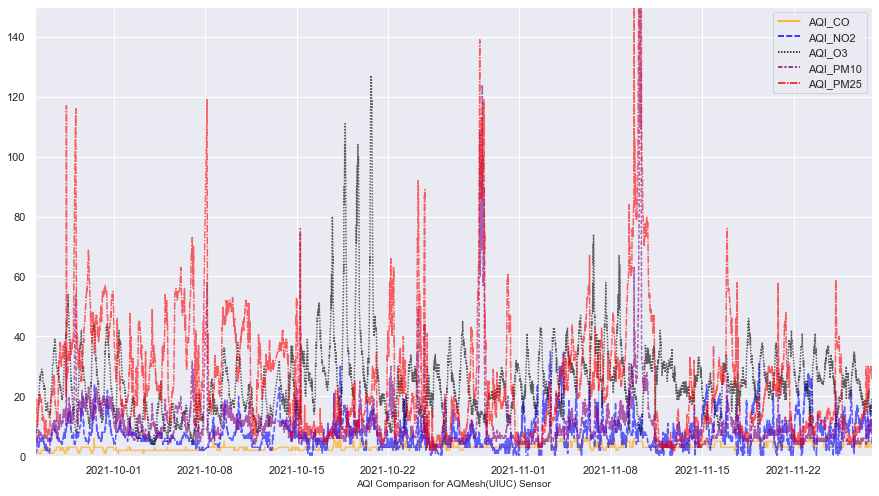

In [197]:
sns.set_context("notebook", font_scale=1)
sns.set(rc={'figure.figsize':(15,8.27)})
left = dt(2021,9,25)
right = dt(2021,11,28)
ax = sns.lineplot(data=df_covertedAQI[['AQI_CO','AQI_NO2','AQI_O3','AQI_PM10','AQI_PM25']],
                  palette = ['orange', 'blue','black','purple', 'red'], alpha=0.6)
#ax = sns.lineplot(data=df_champaign[['pm2.5_Champaign']], palette = ['brown'], alpha=0.6)
ax.set_xlabel('AQI Comparison for AQMesh(UIUC) Sensor', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 150)

In [84]:
from functions import get_label

AQI_combined['combAQI_c']= [get_label(val) for val in AQI_combined['combAQI']]
AQI_combined['AQI_UIUC_PM25_c']= [get_label(val) for val in AQI_combined['AQI_UIUC_PM25']]
AQI_combined['AQI_UrbanaOH_c']= [get_label(val) for val in AQI_combined['AQI_UrbanaOH']]
AQI_combined['AQI_Urbana_c']= [get_label(val) for val in AQI_combined['AQI_Urbana']]
AQI_combined

,combAQI,AQI_UrbanaOH,AQI_Urbana,AQI_UIUC_PM25,combAQI_c,AQI_UrbanaOH_c,AQI_Urbana_c,AQI_UIUC_PM25_c
reading_datestamp,,,,,,,,
2021-09-02 04:45:00,29.0,35,31,29,Good,Good,Good,Good
2021-09-02 05:00:00,28.0,38,34,28,Good,Good,Good,Good
2021-09-02 05:15:00,29.0,38,35,29,Good,Good,Good,Good
2021-09-02 05:30:00,28.0,40,37,28,Good,Good,Good,Good
2021-09-02 05:45:00,29.0,38,38,29,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...
2021-11-28 07:45:00,28.0,62,57,28,Good,Moderate,Moderate,Good
2021-11-28 08:00:00,27.0,62,58,27,Good,Moderate,Moderate,Good
2021-11-28 08:15:00,27.0,62,58,27,Good,Moderate,Moderate,Good


In [118]:
colz= AQI_combined.columns[4:]
for col in colz:
    Comparison[col]=AQI_combined[col].value_counts().to_frame()
Comparison


,AQI_UIUC_PM25_c,combAQI_c,AQI_UrbanaOH_c,AQI_Urbana_c
Good,7594,7466,4873,4964
Moderate,651,760,3197,3134
Unhealthy for Sensitive Groups,32,51,112,105
Unhealthy,21,19,116,95


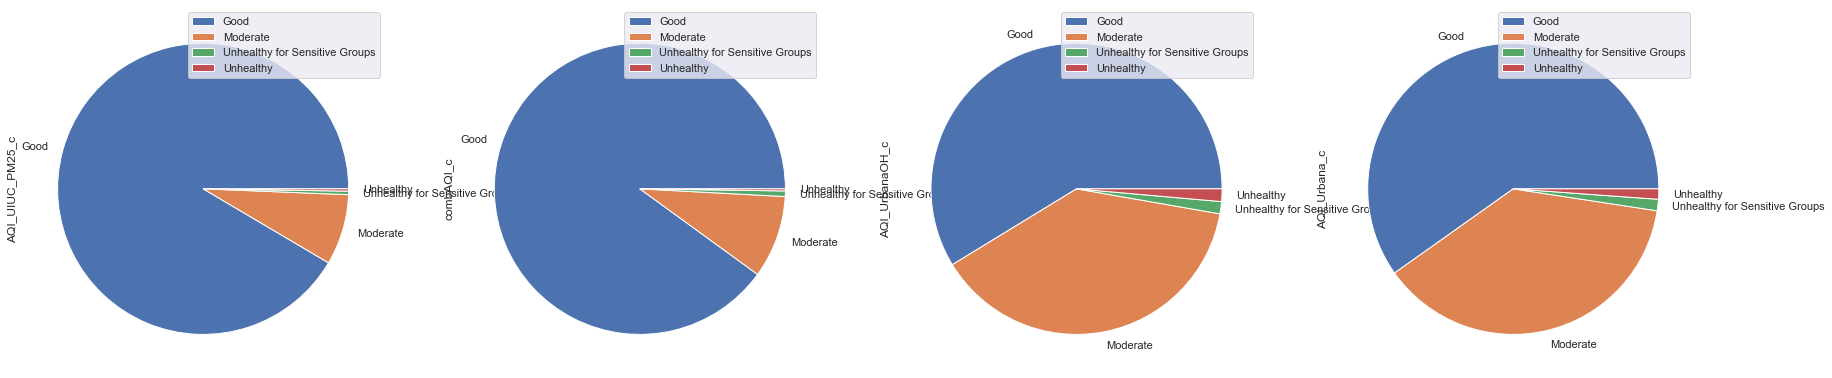

In [119]:
plot = Comparison.plot.pie(subplots=True, figsize=(30, 20))

As shown above, the sensor shows possibile correalations but there tends to be ahigh varibaility in classification of categories which is possibly due to the relative position of sensors. In order to explore this variability it is reccommended that the Purple Air sensor be placed adjacent to the AQMesh UIUC sensor.

Text(0.5, 1.0, 'AQI Based on PM2.5 from Urbana II')

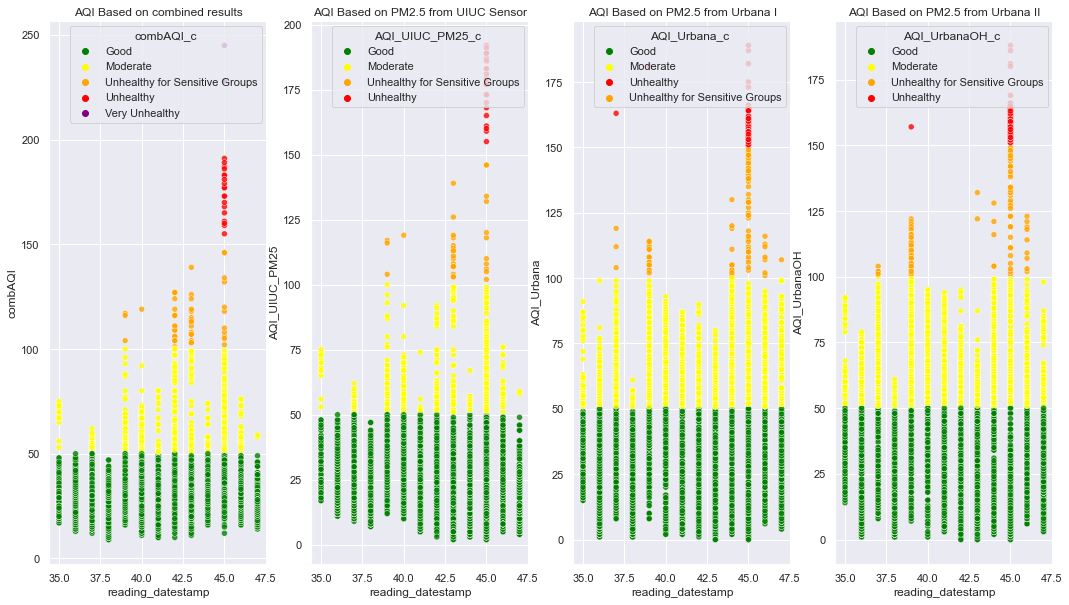

In [164]:
colors = ['purple',  'red', 'orange', 'yellow', 'green']
orders = ['Very Unhealthy', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Moderate', 'Good']
colormap = dict(zip(orders, colors))

fig, axes = plt.subplots(1, 4, figsize=(18, 10))
sns.scatterplot(ax=axes[0],data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['combAQI'],hue='combAQI_c', palette=colormap, alpha=0.8)
axes[0].set_title('AQI Based on combined results')
sns.scatterplot(ax=axes[1],data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['AQI_UIUC_PM25'],
                hue='AQI_UIUC_PM25_c', palette=colormap, alpha=0.8)
axes[1].set_title('AQI Based on PM2.5 from UIUC Sensor')
sns.scatterplot(ax=axes[2],data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['AQI_Urbana'],
                hue='AQI_Urbana_c', palette=colormap, alpha=0.8)
axes[2].set_title('AQI Based on PM2.5 from Urbana I')

sns.scatterplot(ax=axes[3],data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['AQI_UrbanaOH'],
                hue='AQI_UrbanaOH_c', palette=colormap, alpha=0.8)
axes[3].set_title('AQI Based on PM2.5 from Urbana II')

(0.0, 150.0)

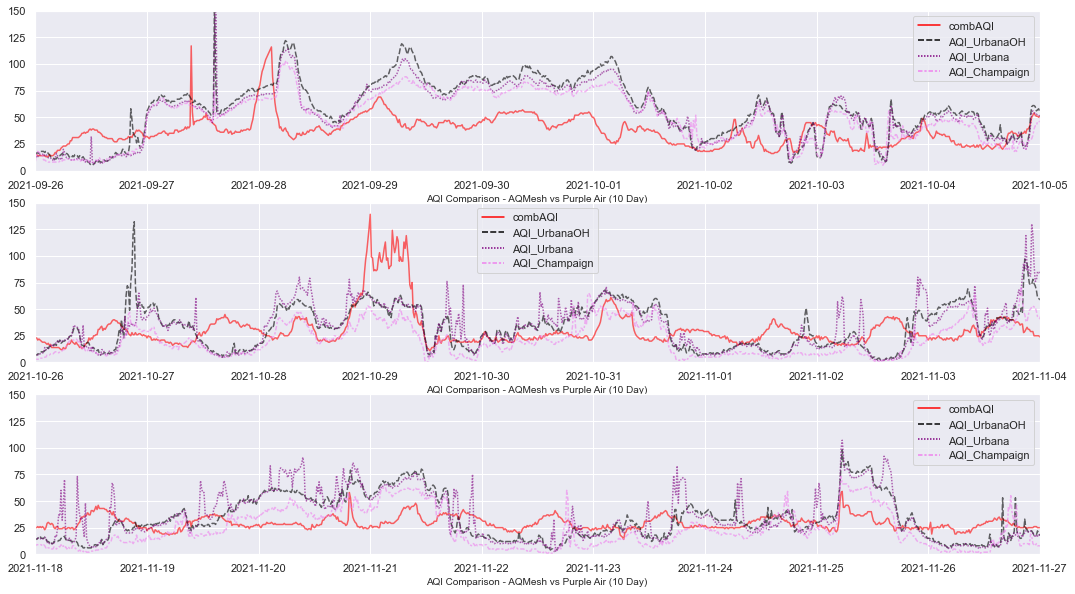

In [192]:
fig, axes = plt.subplots(3, 1, figsize=(18, 10))
left = dt(2021,9,26)
right = dt(2021,10,5)
ax = sns.lineplot(ax=axes[0],data=AQI_combined_all[['combAQI', 'AQI_UrbanaOH','AQI_Urbana','AQI_Champaign']], palette = ['red', 'black','purple','violet'], alpha=0.6)
ax.set_xlabel('AQI Comparison - AQMesh vs Purple Air (10 Day) ', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 150)

left = dt(2021,10,26)
right = dt(2021,11,4)
ax = sns.lineplot(ax=axes[1],data=AQI_combined_all[['combAQI', 'AQI_UrbanaOH','AQI_Urbana','AQI_Champaign']], palette = ['red', 'black','purple', 'violet'], alpha=0.6)
ax.set_xlabel('AQI Comparison - AQMesh vs Purple Air (10 Day) ', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 150)

left = dt(2021,11,18)
right = dt(2021,11,27)
ax = sns.lineplot(ax=axes[2],data=AQI_combined_all[['combAQI', 'AQI_UrbanaOH','AQI_Urbana','AQI_Champaign']], palette = ['red', 'black','purple', 'violet'], alpha=0.6)
ax.set_xlabel('AQI Comparison - AQMesh vs Purple Air (10 Day) ', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 150)

(0.0, 60.0)

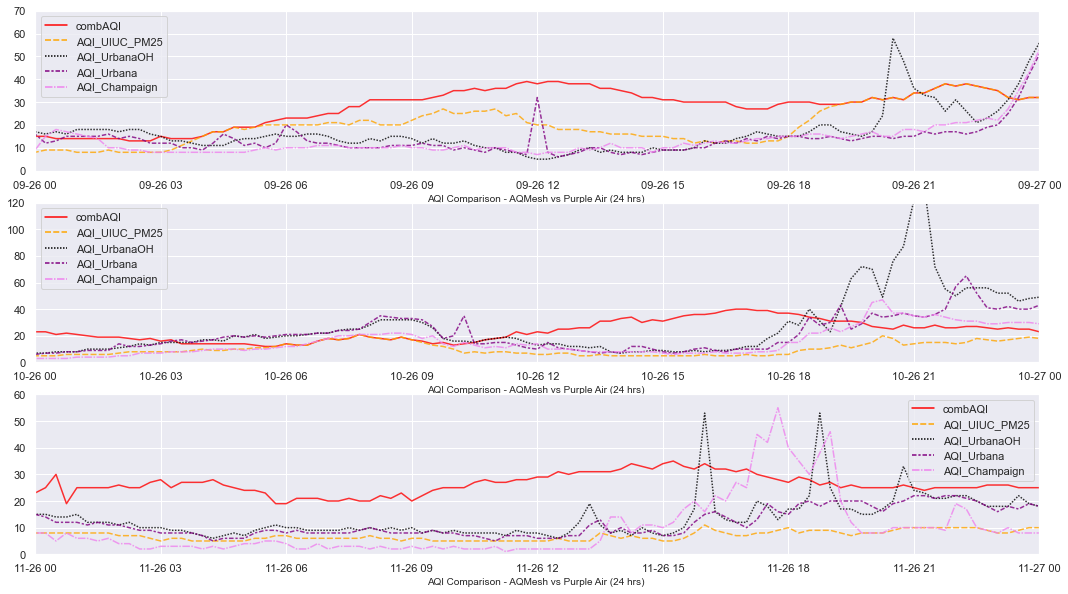

In [193]:
fig, axes = plt.subplots(3, 1, figsize=(18, 10))
left = dt(2021,9,26)
right = dt(2021,9,27)
ax = sns.lineplot(ax=axes[0],data=AQI_combined_all[['combAQI','AQI_UIUC_PM25', 'AQI_UrbanaOH','AQI_Urbana','AQI_Champaign']], palette = ['red','orange', 'black','purple','violet'], alpha=0.8)
#ax = sns.lineplot(data=df_champaign[['pm2.5_Champaign']], palette = ['brown'], alpha=0.6)
ax.set_xlabel('AQI Comparison - AQMesh vs Purple Air (24 hrs) ', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 70)

left = dt(2021,10,26)
right = dt(2021,10,27)
ax = sns.lineplot(ax=axes[1],data=AQI_combined_all[['combAQI','AQI_UIUC_PM25', 'AQI_UrbanaOH','AQI_Urbana','AQI_Champaign']], palette = ['red','orange', 'black','purple','violet'], alpha=0.8)
#ax = sns.lineplot(data=df_champaign[['pm2.5_Champaign']], palette = ['brown'], alpha=0.6)
ax.set_xlabel('AQI Comparison - AQMesh vs Purple Air (24 hrs) ', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 120)

left = dt(2021,11,26)
right = dt(2021,11,27)
ax = sns.lineplot(ax=axes[2],data=AQI_combined_all[['combAQI','AQI_UIUC_PM25', 'AQI_UrbanaOH','AQI_Urbana','AQI_Champaign']], palette = ['red','orange', 'black','purple','violet'], alpha=0.8)
#ax = sns.lineplot(data=df_champaign[['pm2.5_Champaign']], palette = ['brown'], alpha=0.6)
ax.set_xlabel('AQI Comparison - AQMesh vs Purple Air (24 hrs) ', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 60)

In [26]:
#### Other stuff

In [27]:
#Lets get daily values to plot
df4= merged.groupby(np.arange(len(merged))//96).mean()
df4

,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity,pm2.5_UrbanaOH,pm2.5_Urbana
0,286.725521,411.269896,6.415729,6.958021,26.562708,4.896979,6.655000,7.913229,10.094167,10.095104,2.663750,12.758854,72.401042,991.905208,57.272917,8.499466,8.404418
1,299.467604,410.089375,6.174792,6.762292,26.329583,5.718021,7.458750,8.677292,10.563750,10.568229,3.070937,13.639167,71.135417,989.088542,66.889583,9.778185,9.513302
2,313.994687,423.826042,9.386979,5.363333,14.815104,6.971146,9.126354,10.872083,12.339271,12.344062,3.736875,14.745521,68.345833,985.207292,82.271875,14.008238,12.865941
3,282.066146,415.100833,3.879271,7.137708,27.327708,4.204687,5.743021,6.851354,9.103750,9.104687,2.322396,11.016979,73.851042,987.305208,59.314583,6.660988,6.321708
4,286.465521,414.439375,13.467708,9.407708,28.363021,6.741250,8.545625,9.521354,11.155521,11.156354,3.542708,22.875417,77.969792,986.236458,61.846875,13.987104,12.732135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,383.517188,771.364062,1.463333,8.781979,34.313125,1.975833,3.110417,3.963750,6.657292,6.666563,1.213542,10.245312,41.108333,990.441667,63.355208,8.261810,8.861295
83,355.170938,780.025312,1.817292,6.097604,26.516042,4.611875,6.112917,7.371250,10.714479,10.809896,2.517708,7.914896,44.282292,991.337500,72.889583,14.925168,15.823482
84,418.795625,774.775938,0.190937,12.233125,31.339167,0.949688,1.836771,2.637292,5.422500,5.441979,0.703333,12.424062,27.265625,997.381250,64.734375,3.580878,3.171920
85,411.439687,772.568229,0.740625,12.713021,25.014167,2.210313,3.432187,4.405417,6.641250,6.641563,1.326042,13.453646,34.688542,987.183333,69.865625,7.465703,7.374474


ValueError: x and y must have same first dimension, but have shapes (90,) and (87,)

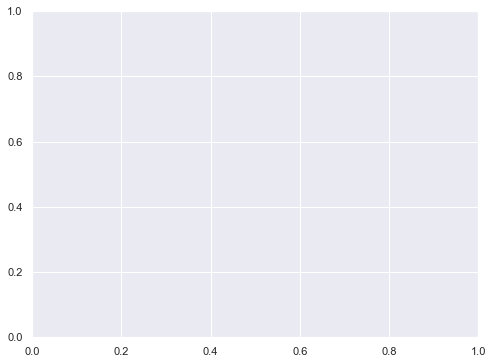

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
  
x = list(range(1, 91))
# ax.plot(x, df4['pm2_5_prescale'].tolist(), label="PM2.5")
ax.plot(x, df4['CO2_prescaled'].tolist(), label="CO2")
#ax.plot(x, df4['co_prescaled'].tolist(), label="CO")
# ax.plot(x, df4['no_prescaled'].tolist(), label="NO")
# ax.plot(x, df4['no2_prescaled'].tolist(), label="NO2")
# ax.plot(x, df4['o3_prescaled'].tolist(), label="Ozone")
# ax.plot(x, df4['temperature_f'].tolist(), label="Temp F")
#ax.plot(x, df4['pressure'].tolist(), label="Pressure")
ax.plot(x, df4['humidity'].tolist(), label="Humidity")
plt.xlabel("Days (1-90)")
#plt.ylabel("PM 2.5 Val in PPB")
plt.legend(title="Legend")

In [ ]:
df4= df3.groupby(np.arange(len(df3))//96).mean()
df4

## Hypothesis 4- CO, NOx and Ozone concentrations are related to the time of the day.

<AxesSubplot:xlabel='reading_datestamp'>

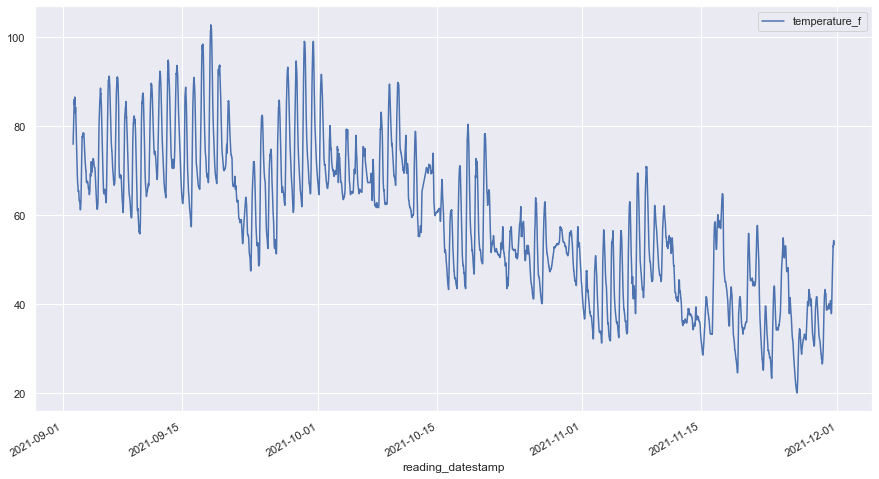

In [201]:
df_scale[['temperature_f']].plot()

Let us consider three working days over the test period, one of the days is chosen from September month which is relatively hot and the remaining two from early fall and lastly from early winter.

(0.0, 80.0)

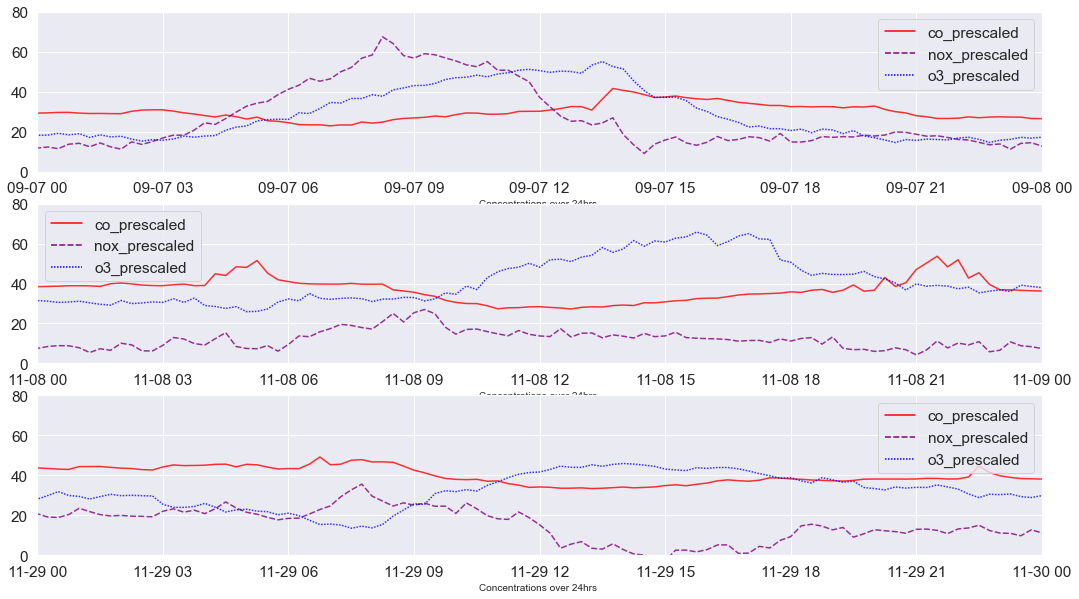

In [288]:
fig, axes = plt.subplots(3, 1, figsize=(18, 10))
left = dt(2021,9,7)
right = dt(2021,9,8)
ax = sns.lineplot(ax=axes[0],data=df_scale[['co_prescaled','nox_prescaled','o3_prescaled']], palette = ['red','purple','blue'], alpha=0.8)
ax.set_xlabel('Concentrations over 24hrs ', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 80)

left = dt(2021,11,8)
right = dt(2021,11,9)
ax = sns.lineplot(ax=axes[1],data=df_scale[['co_prescaled','nox_prescaled','o3_prescaled']], palette = ['red','purple','blue'], alpha=0.8)
ax.set_xlabel('Concentrations over 24hrs ', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 80)

left = dt(2021,11,29)
right = dt(2021,11,30)
ax = sns.lineplot(ax=axes[2],data=df_scale[['co_prescaled','nox_prescaled','o3_prescaled']], palette = ['red','purple','blue'], alpha=0.8)
ax.set_xlabel('Concentrations over 24hrs ', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0, 80)

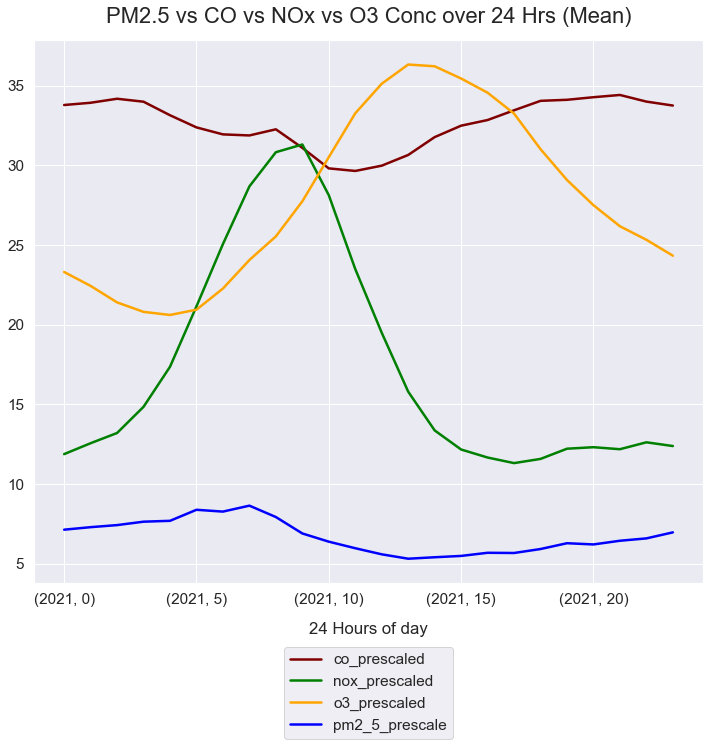

In [283]:
hourly_means = merged.groupby(lambda x: (x.year, x.hour)).mean()

sns.set(font_scale=1.4)
(hourly_means['co_prescaled']/10).plot(figsize=(12, 10), linewidth=2.5, color='maroon')
hourly_means['nox_prescaled'].plot(figsize=(12, 10), linewidth=2.5, color='green')
hourly_means['o3_prescaled'].plot(figsize=(12, 10), linewidth=2.5, color='Orange')
hourly_means['pm2_5_prescale'].plot(figsize=(12, 10), linewidth=2.5, color='blue')
plt.xlabel("24 Hours of day", labelpad=15)
plt.title("PM2.5 vs CO vs NOx vs O3 Conc over 24 Hrs (Mean)", y=1.02, fontsize=22)
plt.legend(loc="lower center",bbox_to_anchor=(0.5, -0.3))

### The average concentrations noted for three months of data using the UIUC (AQMesh) Sensor indicate that oer 24 hours-
- The concentration of Carbon Monoxide in air is lowest in morning and highest at night, indicating potential influence of firewood burning in residences which may have possibly led to this.
- The concentration of NOx components tends to be highest in morning as vehicles and other modes of transportation are used in a short span of time to reach work/school etc.
- PM2.5 values also tend to be higher in morning hours and decline over the rest of the day with an increase again post 20.00 hours.
-Ozone concentrations reach their peak at about mid day.This happens when pollutants emitted by cars, power plants, industrial boilers, refineries, chemical plants, and other sources chemically react in the presence of sunlight.